In [3]:
# imports

# basic - EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# global notebook options
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100


# ML imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

In [4]:
raw_data = pd.read_csv("listings.csv")

In [5]:
# create train and test sets
data, test = train_test_split(raw_data, test_size=.25, random_state=28)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10776 entries, 4227 to 9473
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10776 non-null  int64  
 1   listing_url                                   10776 non-null  object 
 2   scrape_id                                     10776 non-null  int64  
 3   last_scraped                                  10776 non-null  object 
 4   source                                        10776 non-null  object 
 5   name                                          10776 non-null  object 
 6   description                                   10685 non-null  object 
 7   neighborhood_overview                         6527 non-null   object 
 8   picture_url                                   10775 non-null  object 
 9   host_id                                       10776 non-nul

In [7]:
# which columns have greater than 10% null values

remove_cols = data.isnull().sum().sort_values(ascending=False)/data.shape[0]
remove_cols = list(remove_cols[remove_cols >= .10].index)

In [8]:
# columns to remove
remove_cols

['bathrooms',
 'neighbourhood_group_cleansed',
 'license',
 'calendar_updated',
 'neighborhood_overview',
 'neighbourhood',
 'host_about',
 'host_response_rate',
 'host_response_time',
 'host_acceptance_rate',
 'review_scores_value',
 'review_scores_location',
 'review_scores_checkin',
 'review_scores_cleanliness',
 'review_scores_accuracy',
 'review_scores_communication',
 'last_review',
 'first_review',
 'review_scores_rating',
 'reviews_per_month',
 'host_location',
 'host_neighbourhood']

In [9]:
# remove columns with >= 10% null values
data.drop(axis='columns',columns=remove_cols, inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10776 entries, 4227 to 9473
Data columns (total 53 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10776 non-null  int64  
 1   listing_url                                   10776 non-null  object 
 2   scrape_id                                     10776 non-null  int64  
 3   last_scraped                                  10776 non-null  object 
 4   source                                        10776 non-null  object 
 5   name                                          10776 non-null  object 
 6   description                                   10685 non-null  object 
 7   picture_url                                   10775 non-null  object 
 8   host_id                                       10776 non-null  int64  
 9   host_url                                      10776 non-nul

In [11]:
# remove rows with missing values
data.dropna(inplace=True)


In [12]:
# convert price to numeric
data['price'] = data['price'].str.slice(start=1).str.replace(',','').astype('float64')

In [13]:
# add the target variable as monthly revenue
data['monthly_revenue'] = data['price'] * (30 - data['availability_30'])

In [14]:
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,picture_url,host_id,host_url,host_name,host_since,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,monthly_revenue
4227,28483791,https://www.airbnb.com/rooms/28483791,20230316044216,2023-03-16,previous scrape,Austin Bungalow - near ACL!,Classic Austin duplex with 2 bedrooms and 2 fu...,https://a0.muscache.com/pictures/de5a7a94-8558...,13975556,https://www.airbnb.com/users/show/13975556,Zita,2014-04-06,f,https://a0.muscache.com/im/pictures/user/8b4c6...,https://a0.muscache.com/im/pictures/user/8b4c6...,1.0,1.0,"['email', 'phone']",t,t,78704,30.25486,-97.78108,Entire home,Entire home/apt,6,2 baths,2.0,3.0,"[""Carbon monoxide alarm"", ""Washer"", ""Essential...",124.0,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,t,0,0,0,0,2023-03-16,3,0,0,f,1,1,0,0,3720.0
6818,48382988,https://www.airbnb.com/rooms/48382988,20230316044216,2023-03-16,previous scrape,Central East Austin Studio - Extremely Walkable!,"Comfy, modern room in central, charming East A...",https://a0.muscache.com/pictures/miso/Hosting-...,9475947,https://www.airbnb.com/users/show/9475947,Suana,2013-10-17,t,https://a0.muscache.com/im/pictures/user/bed40...,https://a0.muscache.com/im/pictures/user/bed40...,4.0,10.0,"['email', 'phone']",t,t,78702,30.25574,-97.73283,Entire guest suite,Entire home/apt,2,1 bath,1.0,1.0,"[""Bed linens"", ""Hot water"", ""Shampoo"", ""Essent...",199.0,1,1125,1.0,2.0,1125.0,1125.0,1.0,1125.0,t,0,0,0,0,2023-03-16,7,3,0,f,4,2,2,0,5970.0
8871,54280929,https://www.airbnb.com/rooms/54280929,20230316044216,2023-03-16,city scrape,Viva La Austin! Newly Renovated Austin Getaway!,Relax and enjoy the city of Austin in this shi...,https://a0.muscache.com/pictures/miso/Hosting-...,55885216,https://www.airbnb.com/users/show/55885216,Cannon,2016-01-24,t,https://a0.muscache.com/im/pictures/user/70b22...,https://a0.muscache.com/im/pictures/user/70b22...,10.0,11.0,"['email', 'phone']",t,t,78744,30.19800,-97.74192,Entire home,Entire home/apt,5,1.5 baths,2.0,2.0,"[""Private backyard"", ""Stainless steel oven"", ""...",156.0,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,t,3,10,40,133,2023-03-16,93,87,9,f,9,9,0,0,4212.0
10273,643592842990481085,https://www.airbnb.com/rooms/643592842990481085,20230316044216,2023-03-16,previous scrape,Northwest Austin 1/1 condo with panoramic views,You're going to feel right at home in this bea...,https://a0.muscache.com/pictures/miso/Hosting-...,367136378,https://www.airbnb.com/users/show/367136378,Dan,2020-09-11,t,https://a0.muscache.com/im/pictures/user/af7da...,https://a0.muscache.com/im/pictures/user/af7da...,2.0,2.0,"['email', 'phone']",t,t,78730,30.35936,-97.79586,Entire condo,Entire home/apt,1,1 bath,1.0,1.0,"[""Valley view"", ""Free parking on premises"", ""H...",86.0,90,120,90.0,90.0,120.0,120.0,90.0,120.0,t,0,28,58,58,2023-03-16,0,0,0,f,1,1,0,0,2580.0
2517,16946888,https://www.airbnb.com/rooms/16946888,20230316044216,2023-03-16,previous scrape,Treehouse Retreat,"My place is close to Sprouts Farmers Market, I...",https://a0.muscache.com/pictures/e343453d-3058...,113297762,https://www.airbnb.com/users/show/113297762,Amanda,2017-01-25,f,https://a0.muscache.com/im/pictures/user/024ef...,https://a0.muscache.com/im/pictures/user/024ef...,1.0,1

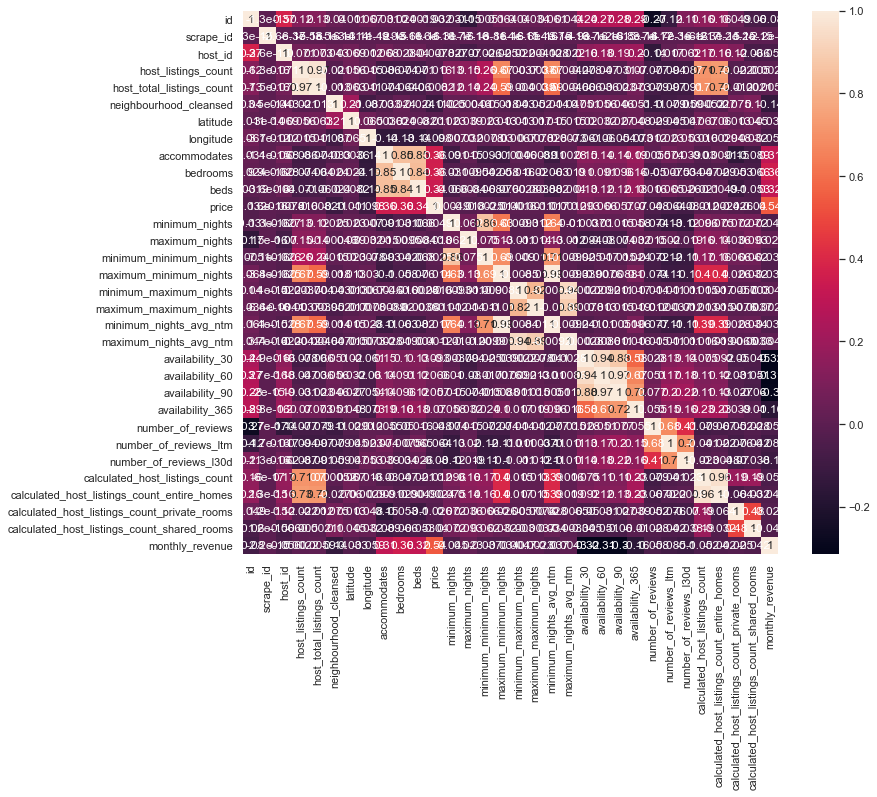

In [17]:
plt.subplots(figsize=(12,10))
sns.heatmap(data.select_dtypes(include='number').corr(), annot=True)
plt.show()

In [ ]:
data.select_dtypes(exclude='number')

In [ ]:
# create train and test sets
#X = data.drop(['monthly_revenue'], axis=1)
#y = data['monthly_revenue']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=28)

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,4,1)
sns.stripplot(x = 'host_is_superhost',y = 'monthly_revenue', data = data)
plt.subplot(1,4,2)
sns.stripplot(x = 'host_has_profile_pic', y = 'monthly_revenue', data = data)
plt.subplot(1,4,3)
sns.stripplot(x = 'host_identity_verified', y = 'monthly_revenue', data = data)
plt.subplot(1,4,4)
sns.stripplot(x = 'instant_bookable', y = 'monthly_revenue', data = data)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize = (12,6))
plt.subplot(1,4,1)
sns.boxplot(x = 'host_is_superhost',y = 'monthly_revenue', data = data, notch=True)
plt.yscale('log')
plt.subplot(1,4,2)
sns.boxplot(x = 'host_has_profile_pic', y = 'monthly_revenue', data = data, notch=True)
plt.yscale('log')
plt.subplot(1,4,3)
sns.boxplot(x = 'host_identity_verified', y = 'monthly_revenue', data = data, notch=True)
plt.yscale('log')
plt.subplot(1,4,4)
sns.boxplot(x = 'instant_bookable', y = 'monthly_revenue', data = data, notch=True)
plt.tight_layout()
plt.yscale('log')
plt.show()